# HW04: Problem 6: Feature Selection

## Description

In this problem we will work with the diabetes dataset from sklearn. This data set is for a regression problem where 10 features are used to predict the progression of diabetes. The dataset is described in more detail [here](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset). You task here is to use multiple techniques of feature selection to try to interpret the strength of the features in the dataset. You will need to use the following techniques:

- Pearson correlation coefficient using r_regression from sklearn (univariate feature selection)
- Mutual information using mutual_info_regression from sklearn (univariate feature selection)
- Random forest feature importance using RandomForestRegressor from sklearn (multivariate feature selection)
- Recursive feature elimination using sklearn.feature.selection.RFE with a Support Vector Regressor SVR (multivariate feature selection)

For each method you will need to plot the feature importance as a bar graph. The importance goes by different names in different algorithms. For example, in r_regression it is just the output (r value) and the mutual information in mutual_info_regression. In random variable it is called feature_importance_ and in RFE it is the ranking_. The bar graph will be sorted from most important features to least important features, with the y value being the importance of that feature, and the x value being the rank but labeled with the feature name.
You will also need to print out the top 5 features for each method. You will need to use the following code to load the data and split it into training and testing sets. You will need to use the training set for all of the feature selection methods.

* Are there 3 features that are selected in the top 5 by all 4 methods? 
* If so, what are they? 
* If not, what are the 3 features that are selected by the most methods? 
* How would it be possible that univariate methods might select different features than multivariate methods? 
* How does dependence between features affect the feature selection methods?

For good habits, make sure you split your code into training and testing. You may not even use the testing data but when you do any analysis such as feature selection, remember you must not use the testing data. You should also make sure you use the same random seed for all of your feature selection methods so that you can compare the results.

## Hints: In sorting features you use "arg" sort. This will return the indices of the sorted array. You can use these indices to sort the feature names.

This kind of code will be useful for plotting the bar graph:

```python
r_inds = np.argsort(np.abs(r_importance))[::-1]
fig, ax = plt.subplots()
rank = np.arange(len(data.feature_names))
ax.bar(rank, r_importance[r_inds])
ax.set_xticks(rank)
ax.set_xticklabels(np.array(data.feature_names)[r_inds])
```

In [7]:
# Some imports you will need
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from numpy import corrcoef
import seaborn as sns
from sklearn.feature_selection import r_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import pandas as pd
from pandas.plotting import scatter_matrix

## Loading and preparing the data

In [2]:
# Load the diabetes data set as X, y
X, y = load_diabetes(return_X_y=True)
# Load the diabetes data set as data to read the description
data = load_diabetes()

In [3]:
# Print out the DESCR attribute to inpect the variables
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [4]:
# Print the array of feature names
print('Feature names:', data.feature_names)

Feature names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [5]:
# Split the Data into train/testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [6]:
# Check the shapes
print('X:', X.shape, 'y:', y.shape)
print('X_train:', X_train.shape, 'y_train:', y_train.shape)
print('X_test:', X_test.shape, 'y_test:', y_test.shape)

X: (442, 10) y: (442,)
X_train: (353, 10) y_train: (353,)
X_test: (89, 10) y_test: (89,)


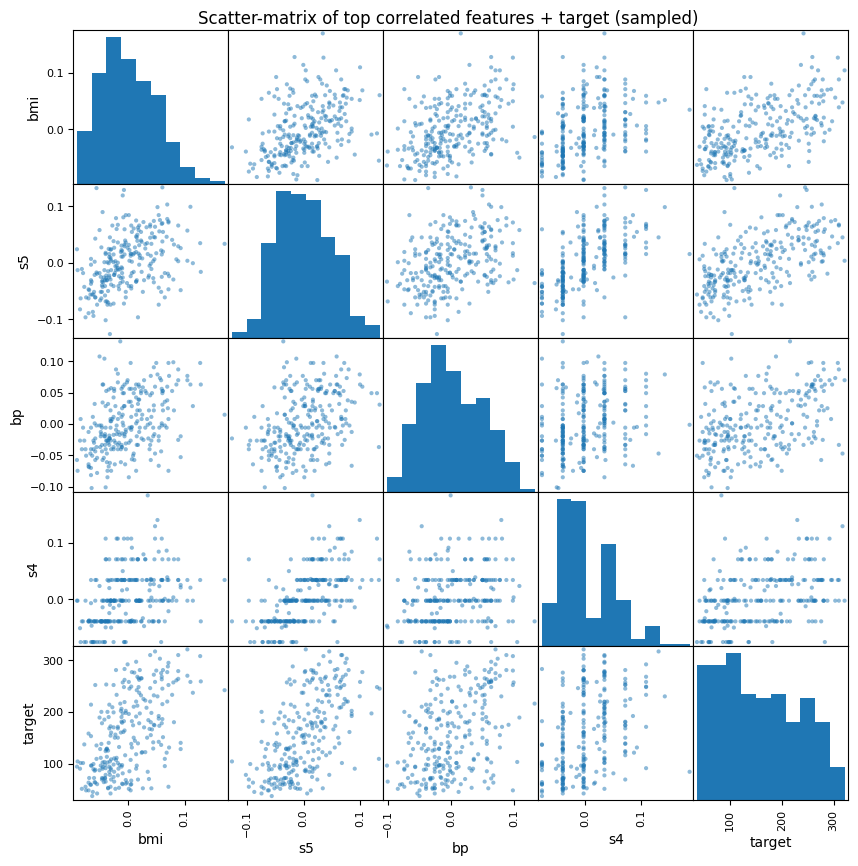

Top correlated features: ['bmi', 's5', 'bp', 's4']


In [9]:
# Do a pair plot 
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

corr_with_target = df.corr(numeric_only=True)['target'].drop('target').abs().sort_values(ascending=False)
top_feats = list(corr_with_target.head(4).index)

df_sample = df[top_feats + ['target']].sample(n=min(250, len(df)), random_state=42)

axes = scatter_matrix(df_sample, figsize=(10, 10), diagonal='hist')
plt.suptitle('Scatter-matrix of top correlated features + target (sampled)', y=0.9)
plt.show()

print('Top correlated features:', top_feats)

Q: What does the EDA tell you about the data?

A Here: 
Features are standardized and it is linear relationship between those features: 'bmi' with 's5'and 'bp'. Some predictors are also correlated with each other but are not fully independent.

## Univariate feature selection with r_regression

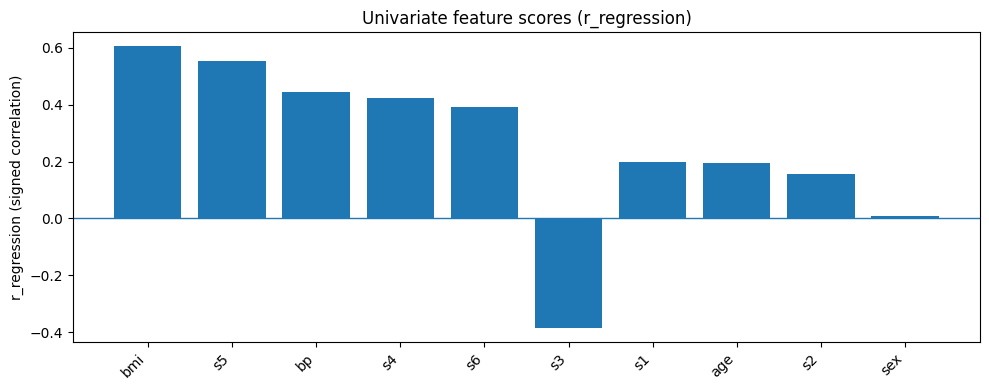

In [10]:
# Use r_regression to get the feature importance, sort by the absolute value
# but show the signed value on y and label on x by variable name
# Should be a bar graph

r_scores = r_regression(X_train, y_train)
r_series = pd.Series(r_scores, index=data.feature_names)

order = r_series.abs().sort_values(ascending=False).index
plt.figure(figsize=(10,4))
plt.bar(order, r_series.loc[order].values)
plt.axhline(0, linewidth=1)
plt.xticks(rotation=45, ha='right')
plt.ylabel('r_regression (signed correlation)')
plt.title('Univariate feature scores (r_regression)')
plt.tight_layout()
plt.show()

In [11]:
# print the top 5 features according to r_regression?
top5_r = list(r_series.abs().sort_values(ascending=False).head(5).index)
print('Top 5 (r_regression):', top5_r)
print(r_series.loc[top5_r])


Top 5 (r_regression): ['bmi', 's5', 'bp', 's4', 's6']
bmi    0.604751
s5     0.552183
bp     0.444770
s4     0.425094
s6     0.390363
dtype: float64


## Univariate feature selection with mutual information using mutual_info_regression

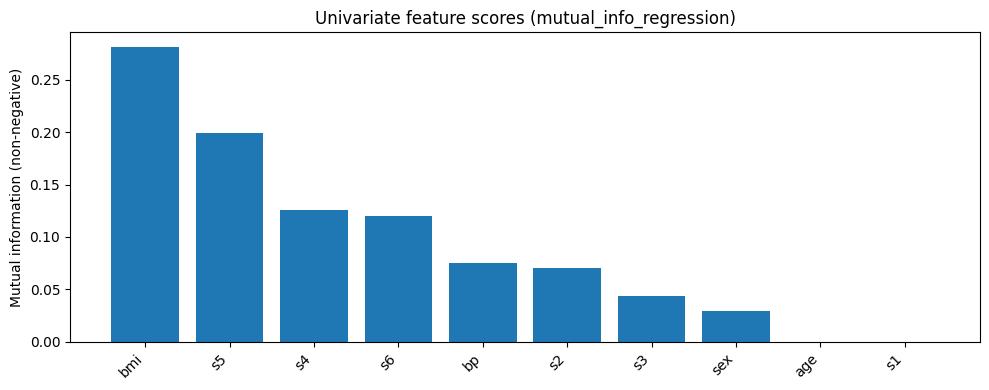

In [12]:
# Use mutual_info_regression to get the feature importance, sort by the absolute value
# but show the signed value on y and label on x by variable name
# Should be a bar graph
mi_scores = mutual_info_regression(X_train, y_train, random_state=42)
mi_series = pd.Series(mi_scores, index=data.feature_names)

order = mi_series.sort_values(ascending=False).index
plt.figure(figsize=(10,4))
plt.bar(order, mi_series.loc[order].values)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Mutual information (non-negative)')
plt.title('Univariate feature scores (mutual_info_regression)')
plt.tight_layout()
plt.show()

In [13]:
# What are the top 5 features according to mutual_info_regression?
top5_mi = list(mi_series.sort_values(ascending=False).head(5).index)
print('Top 5 (mutual_info_regression):', top5_mi)
print(mi_series.loc[top5_mi])

Top 5 (mutual_info_regression): ['bmi', 's5', 's4', 's6', 'bp']
bmi    0.281084
s5     0.199034
s4     0.126175
s6     0.120421
bp     0.075573
dtype: float64


## Multivariate feature selection with Random Forest feature_importance_

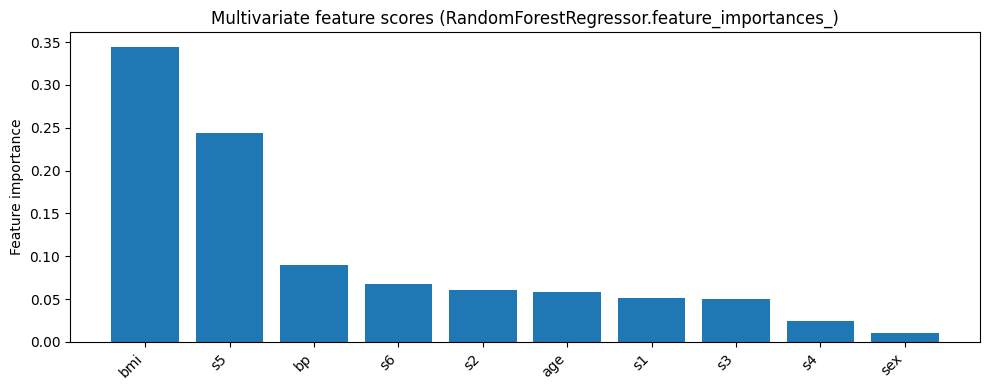

In [14]:
# Use random forest feature_importance_ to get the feature importance, sort by the absolute value
# but show the signed value on y and label on x by variable name
# Should be a bar graph
rf = RandomForestRegressor(n_estimators=500, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

rf_series = pd.Series(rf.feature_importances_, index=data.feature_names)

order = rf_series.sort_values(ascending=False).index
plt.figure(figsize=(10,4))
plt.bar(order, rf_series.loc[order].values)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Feature importance')
plt.title('Multivariate feature scores (RandomForestRegressor.feature_importances_)')
plt.tight_layout()
plt.show()

In [15]:
# What are the top 5 features according to random forest feature_importance_?
top5_rf = list(rf_series.sort_values(ascending=False).head(5).index)
print('Top 5 (Random Forest importances):', top5_rf)
print(rf_series.loc[top5_rf])

Top 5 (Random Forest importances): ['bmi', 's5', 'bp', 's6', 's2']
bmi    0.344243
s5     0.244306
bp     0.089540
s6     0.067840
s2     0.060195
dtype: float64


## Multivariate feature selection with recursive feature elimination (RFE) using a support vector regressor

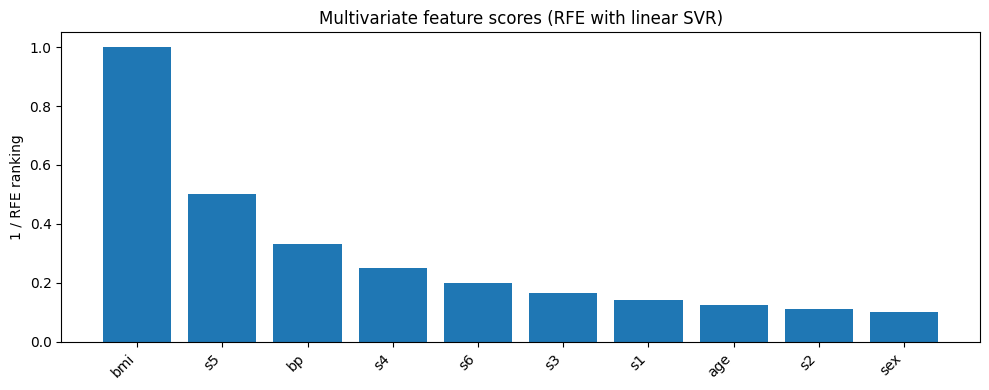

In [16]:
# Use recursive feature elimination (RFE) with a support vector regressor 
# to get the feature importance, sort by the absolute value
# but show the signed value on y and label on x by variable name
# Should be a bar graph
svr = SVR(kernel='linear')
rfe = RFE(estimator=svr, n_features_to_select=1, step=1)
rfe.fit(X_train, y_train)

rfe_rank = pd.Series(rfe.ranking_, index=data.feature_names)
rfe_series = 1 / rfe_rank  # higher = better

order = rfe_series.sort_values(ascending=False).index
plt.figure(figsize=(10,4))
plt.bar(order, rfe_series.loc[order].values)
plt.xticks(rotation=45, ha='right')
plt.ylabel('1 / RFE ranking')
plt.title('Multivariate feature scores (RFE with linear SVR)')
plt.tight_layout()
plt.show()

In [17]:
# What are the top 5 features according to RFE with SVR?
top5_rfe = list(rfe_series.sort_values(ascending=False).head(5).index)
print('Top 5 (RFE + linear SVR):', top5_rfe)
print('RFE ranks (1=best) for top 5:')
print(rfe_rank.loc[top5_rfe].sort_values())


Top 5 (RFE + linear SVR): ['bmi', 's5', 'bp', 's4', 's6']
RFE ranks (1=best) for top 5:
bmi    1
s5     2
bp     3
s4     4
s6     5
dtype: int64


## Conclusions

Q1: Are there 3 features that are selected in the top 5 by all 4 methods?

A1: Yes, there are 4 features that are selected by all 4 methods.

Q2: If so, what are they? / If not, what are the 3 features that are selected by the most methods?

A2: The features selected by all four methods are:
'bmi', 's5', 's6', and 'bp'.

Q3: How would it be possible that univariate methods might select different features than multivariate methods?

A3: Methods evaluate each feature independently, looking at its relationship with the target. In contrast, multivariate methods evaluate features together and consider how they interact with each other. Because of this, a feature that looks weak on its own might become important when combined with others, and vice versa. 

Q4: How does dependence between features affect the feature selection methods?

A4: If features are highly correlated, they contain similar information. Some methods may select both correlated features, even though they contribute redundant information. This can make the model less stable, since small changes in the data might cause the model to favor one correlated feature over another. It can also lead to overestimating their importance because the same information is effectively counted twice.